# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Download the stopwords corpus if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Load the dataset from Kaggle

In [3]:
dataset = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Select the relevant columns

In [4]:
df = dataset[['v2', 'v1']]
df.columns = ['text', 'label']

# Data Analysis

In [5]:
df.shape

(5572, 2)

In [6]:
#Drop duplicated values
df=df.drop_duplicates()
df.shape

(5169, 2)

In [7]:
df['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

# Data Visualization

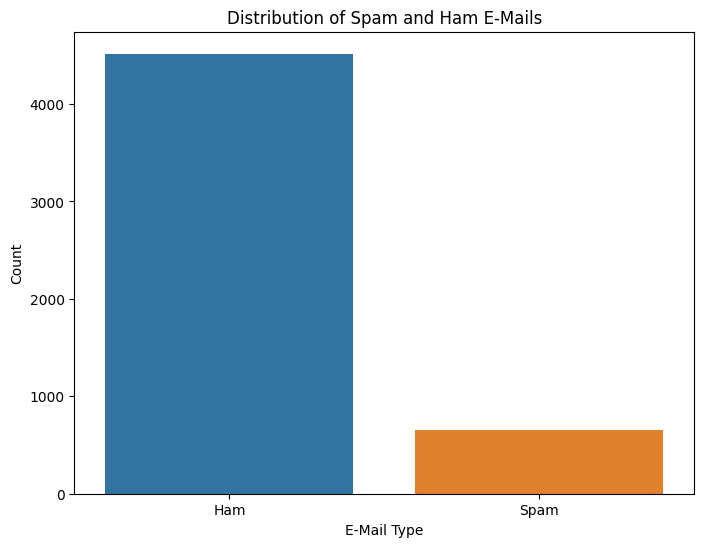

In [8]:
# Create a bar plot to visualize the distribution of spam and ham messages
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='label')

plt.xlabel('E-Mail Type')
plt.ylabel('Count')

plt.title('Distribution of Spam and Ham E-Mails')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

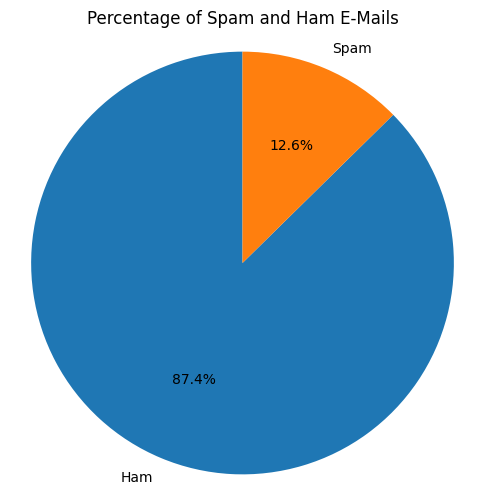

In [9]:
# Count the number of spam and ham messages
spam_count = df['label'].value_counts()[1]
ham_count = df['label'].value_counts()[0]

# Create a pie chart to show the percentage of spam and ham messages
plt.figure(figsize=(6, 6))
labels = ['Ham', 'Spam']

sizes = [ham_count, spam_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Percentage of Spam and Ham E-Mails')
plt.axis('equal')
plt.show()

# Preprocess the text data

In [10]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

# Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, 
                                                    random_state=42)

In [12]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert the target values into 0 and 1

In [13]:
try:
    y_train = y_train.astype(int)
    y_test = y_test.astype(int)
except:
    pass

# Train the classifier

In [14]:
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

MultinomialNB()

# Make predictions on the test data

In [15]:
y_pred = classifier.predict(X_test_features)

# Evaluate the performance of the classifier

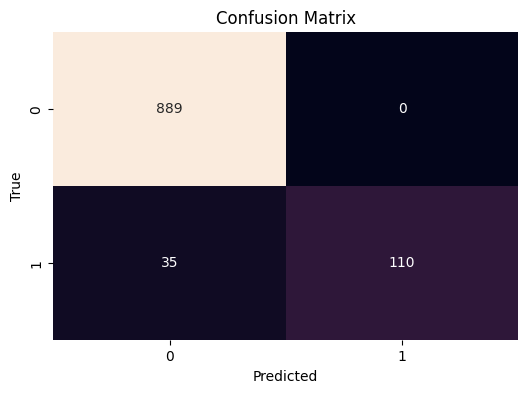

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title('Confusion Matrix')
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       889
        spam       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034

